In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
iris_raw = pd.read_csv('iris-data.csv')

In [3]:
iris_raw.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# from info we observe that there are 5 entries with null values in petal_width

In [6]:
# make a copy of the original dataframe for cleaning
iris_clean = iris_raw.copy()

In [7]:
# null values represent a small amount of observations from the total
# Thus, it would make sense to drop these observations
# Replacing with zero doesn't make sense for a petal width measurement
iris_clean = iris_clean.dropna()

In [8]:
# Check general descriptive statistics
iris_clean.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,145.000000,145.000000,145.000000,145.000000
mean,5.670303,3.046207,3.836552,1.236552
std,1.326540,0.435096,1.742955,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# What it is mainly observed are very low values of minimum speal length and petal width
# These values are typically data entry errors from measurements

Text(0.5, 1.05, 'Sepal Length distribution')

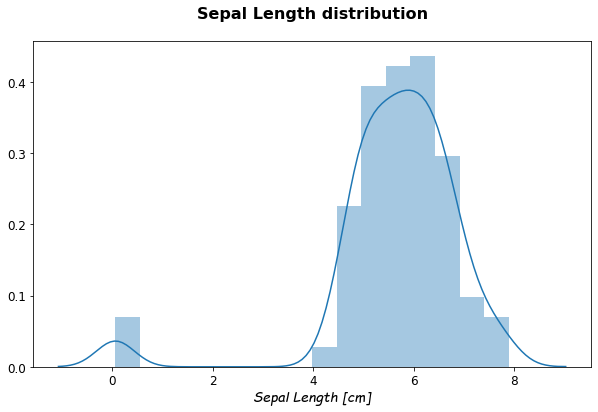

In [10]:
# Plot distribution of sepal length
plt.figure(figsize=(10,6))
sns.distplot(iris_clean.sepal_length_cm)
# Tweak using Matplotlib
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
label_prop = {'size':14,'family':'fantasy','style':'oblique'}
plt.xlabel('Sepal Length [cm]',fontdict=label_prop)

plt.title('Sepal Length distribution', size=16, weight='bold',y=1.05)

In [11]:
# From the plot above the outliers are clearly identified
# As a threshold, anything below 2 for sepal length measurementswill be drop
iris_clean = iris_clean[iris_clean.sepal_length_cm > 2]

In [12]:
# Only five entries are drop from the operation
iris_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  140 non-null    float64
 1   sepal_width_cm   140 non-null    float64
 2   petal_length_cm  140 non-null    float64
 3   petal_width_cm   140 non-null    float64
 4   class            140 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.6+ KB


Text(0.5, 1.05, 'Petal Width distribution')

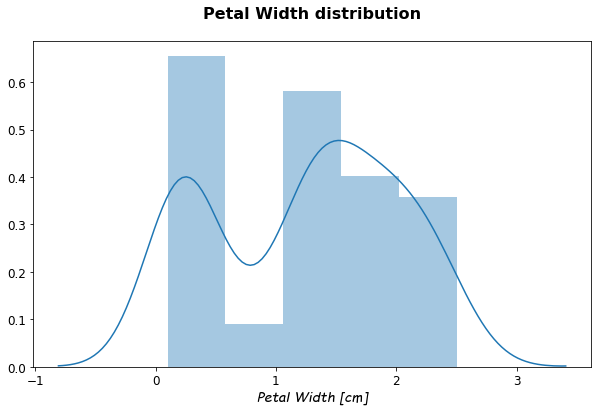

In [13]:
# Plot distribution of petal width
plt.figure(figsize=(10,6))
sns.distplot(iris_clean.petal_width_cm)
# Tweak using Matplotlib
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
label_prop = {'size':14,'family':'fantasy','style':'oblique'}
plt.xlabel('Petal Width [cm]',fontdict=label_prop)

plt.title('Petal Width distribution', size=16, weight='bold',y=1.05)

In [14]:
# we observe a clear bi-modal distribution above.
# We can't conclude that minimum values of petal width are outliers

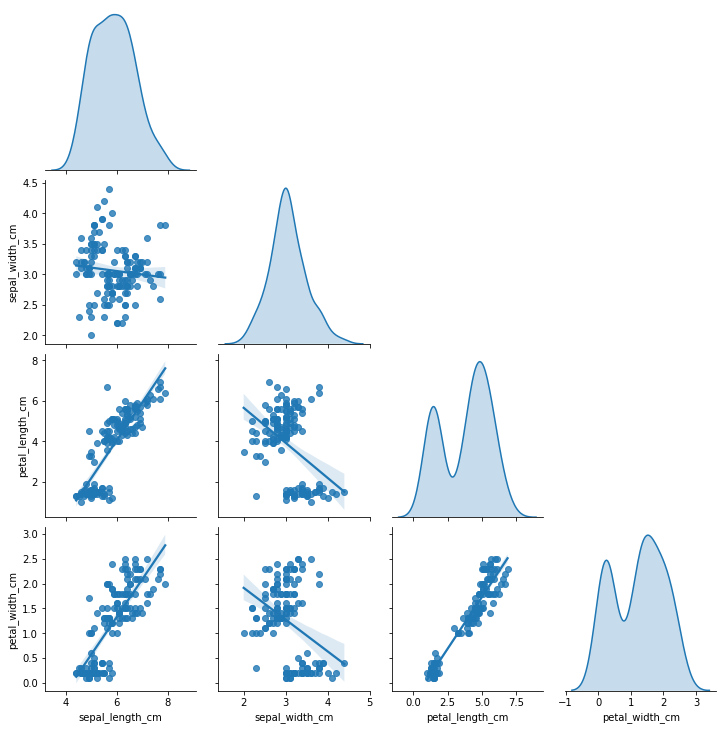

In [15]:
# complete scatter plot and distribution analysis of cleaned dataset
sns.pairplot(data = iris_clean,kind='reg',diag_kind='kde',corner=True)

In [17]:
# save to csv
iris_clean.to_csv('iris_cleaned.csv')